In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Load Data

In [2]:
df = pd.read_csv('./dress_rental_prices.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

,ID,Name,Brand,Colour,Catagories,Price
0,74416,Runway stripe dress,Stella McCartney,beige,dresses,111
1,73815,Reformation Kourtney Dress,Reformation,beige,dresses,50
2,73801,Ivory Viola bridal dress,Ghost,beige,dresses,75
3,73718,Pasu Dress - Rhino Tusk,Coucoo,beige,dresses,37
4,73605,Ellen,RIXO,beige,dresses,47
...,...,...,...,...,...,...
29992,872,Silk and wool-blend crepe dress yellow,Victoria Beckham,yellow,"dresses, Smart, midi, Short Sleeve, Pencil, Mo...",102
29993,871,La Guardia Matching Set,Faithfull The Brand,yellow,"dresses, Floral, Polka Dot, Loose, Smart Casua...",43
29994,844,One-shoulder ruffled crepe mini dress,Solace London,yellow,"dresses, Vinyl-PVC-Synthetics, Smart, Formal, ...",75
29995,592,Billie Dress,Rebecca Vallance,yellow,"dresses, Cotton-Jersey, Tie-Front, Skinny-Fit,...",42


In [3]:
# set ID as index
df.set_index('ID', inplace=True)
df

,Name,Brand,Colour,Catagories,Price
ID,,,,,
74416,Runway stripe dress,Stella McCartney,beige,dresses,111
73815,Reformation Kourtney Dress,Reformation,beige,dresses,50
73801,Ivory Viola bridal dress,Ghost,beige,dresses,75
73718,Pasu Dress - Rhino Tusk,Coucoo,beige,dresses,37
73605,Ellen,RIXO,beige,dresses,47
...,...,...,...,...,...
872,Silk and wool-blend crepe dress yellow,Victoria Beckham,yellow,"dresses, Smart, midi, Short Sleeve, Pencil, Mo...",102
871,La Guardia Matching Set,Faithfull The Brand,yellow,"dresses, Floral, Polka Dot, Loose, Smart Casua...",43
844,One-shoulder ruffled crepe mini dress,Solace London,yellow,"dresses, Vinyl-PVC-Synthetics, Smart, Formal, ...",75


Name            2
Brand           0
Colour          0
Catagories    114
Price           0
dtype: int64


<BarContainer object of 5 artists>

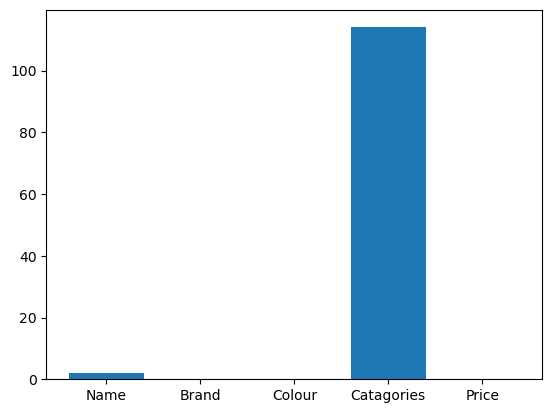

In [4]:
#Check for missing values
print(df.isnull().sum())
plt.bar( df.columns, df.isnull().sum())

In [5]:
# duplicates
df.duplicated().sum()


168

In [6]:
#Drop duplicates
df.drop_duplicates(inplace=True)


<BarContainer object of 5 artists>

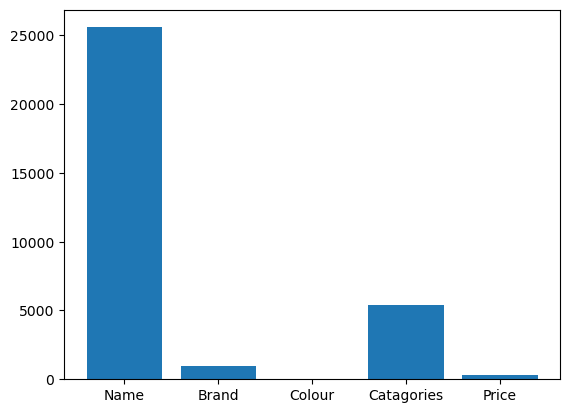

In [7]:
#no. of unique values in each column
plt.bar(df.columns, [df[col].nunique() for col in df.columns])

In [8]:
# rows where name and catagories is null
df[df['Catagories'].isnull()][['Name', 'Catagories']]

,Name,Catagories
ID,,
61602,Terri Dress in Bobcat,NaN
65649,Twill Mini Dress,NaN
33095,Cottage Puff Dress,NaN
27801,Andromeda Gown,NaN
28033,Dress,NaN
...,...,...
55593,Aubrielle white sequin dress,NaN
8496,Wavelength Midi Dress,NaN
26082,NEVA DRESS,NaN


In [9]:
import re
keywords = {}
for i in df.Catagories.dropna():
    
    words = [word.lower() for word in i.split()]
    #remove special characters and numbers
    words = [re.sub(r'[^a-z]', '', word) for word in words]
    for word in words:
        if word in keywords:
            keywords[word] += 1
        else:
            keywords[word] = 1
keywords


{'dresses': 29662,
 'midi': 2862,
 'bottoms': 9,
 'woolcashmere': 224,
 'loose': 1969,
 'winter': 1037,
 '': 1471,
 'sleeves': 1473,
 'scoop': 145,
 'neck': 614,
 'monochrome': 1982,
 'casual': 2302,
 'cottonjersey': 1007,
 'floral': 1685,
 'smart': 3602,
 'seasonal': 3644,
 'maxi': 1566,
 'short': 1165,
 'sleeve': 2798,
 'aline': 2263,
 'mini': 1648,
 'fitted': 45,
 'yk': 1,
 'party': 16,
 'loosefit': 62,
 'shift': 2,
 'smock': 7,
 'cotton': 1216,
 'summer': 3814,
 'baby': 248,
 'blue': 571,
 'green': 617,
 'regularfit': 1290,
 'formal': 1169,
 'tiefront': 464,
 'long': 1239,
 'sleeveless': 930,
 'metallic': 380,
 'ruffled': 447,
 'white': 1756,
 'cowl': 73,
 'light': 256,
 'pinkblush': 251,
 'wrap': 561,
 'lace': 310,
 'skinnyfit': 82,
 'spaghetti': 414,
 'straps': 412,
 'vnecks': 2185,
 'pencil': 254,
 'animal': 197,
 'print': 347,
 'strapless': 108,
 'black': 1526,
 'true': 372,
 'red': 375,
 'mesh': 43,
 'bodycon': 240,
 'bell': 388,
 'crew': 374,
 'leatherfaux': 9,
 'leather': 9,

In [10]:
# MOst common keywords
#words whose frequency is greater than 100
common_keywords = {k:v for k,v in keywords.items() if v>900}
common_keywords

{'dresses': 29662,
 'midi': 2862,
 'loose': 1969,
 'winter': 1037,
 '': 1471,
 'sleeves': 1473,
 'monochrome': 1982,
 'casual': 2302,
 'cottonjersey': 1007,
 'floral': 1685,
 'smart': 3602,
 'seasonal': 3644,
 'maxi': 1566,
 'short': 1165,
 'sleeve': 2798,
 'aline': 2263,
 'mini': 1648,
 'cotton': 1216,
 'summer': 3814,
 'regularfit': 1290,
 'formal': 1169,
 'long': 1239,
 'sleeveless': 930,
 'white': 1756,
 'vnecks': 2185,
 'black': 1526}

In [11]:
#sort the keywords by frequency
sorted_keywords = dict(sorted(common_keywords.items(), key=lambda x:x[1], reverse=True))
sorted_keywords

{'dresses': 29662,
 'summer': 3814,
 'seasonal': 3644,
 'smart': 3602,
 'midi': 2862,
 'sleeve': 2798,
 'casual': 2302,
 'aline': 2263,
 'vnecks': 2185,
 'monochrome': 1982,
 'loose': 1969,
 'white': 1756,
 'floral': 1685,
 'mini': 1648,
 'maxi': 1566,
 'black': 1526,
 'sleeves': 1473,
 '': 1471,
 'regularfit': 1290,
 'long': 1239,
 'cotton': 1216,
 'formal': 1169,
 'short': 1165,
 'winter': 1037,
 'cottonjersey': 1007,
 'sleeveless': 930}

In [12]:
sorted_keywords.keys()

dict_keys(['dresses', 'summer', 'seasonal', 'smart', 'midi', 'sleeve', 'casual', 'aline', 'vnecks', 'monochrome', 'loose', 'white', 'floral', 'mini', 'maxi', 'black', 'sleeves', '', 'regularfit', 'long', 'cotton', 'formal', 'short', 'winter', 'cottonjersey', 'sleeveless'])

In [13]:
for i, row in df[df.Catagories.isnull()].iterrows():
    l = []
    for word in row['Name'].split():
        if word.lower() in keywords.keys():
            l.append(word.lower())
    if l:
        df.loc[i, 'Catagories'] = ' '.join(l)
df.isnull().sum()

Name           2
Brand          0
Colour         0
Catagories    15
Price          0
dtype: int64

In [14]:
df.Catagories.fillna('Others', inplace=True)
df.isnull().sum()

Name          2
Brand         0
Colour        0
Catagories    0
Price         0
dtype: int64

In [15]:
#remove catagories not in sorted_keywords
for i, row in df.iterrows():
    l = []
    for word in row['Catagories'].split():
        word = word.lower()
        word = re.sub(r'[^a-z]', '', word)
        if word in sorted_keywords.keys():
            l.append(word)
    if l:
        df.loc[i, 'Catagories'] = ','.join(l)
    else:
        df.loc[i, 'Catagories'] = 'Others'

In [16]:
df

,Name,Brand,Colour,Catagories,Price
ID,,,,,
74416,Runway stripe dress,Stella McCartney,beige,dresses,111
73815,Reformation Kourtney Dress,Reformation,beige,dresses,50
73801,Ivory Viola bridal dress,Ghost,beige,dresses,75
73718,Pasu Dress - Rhino Tusk,Coucoo,beige,dresses,37
73605,Ellen,RIXO,beige,dresses,47
...,...,...,...,...,...
872,Silk and wool-blend crepe dress yellow,Victoria Beckham,yellow,"dresses,smart,midi,short,sleeve,monochrome",102
871,La Guardia Matching Set,Faithfull The Brand,yellow,"dresses,floral,loose,smart,casual,summer,midi,...",43
844,One-shoulder ruffled crepe mini dress,Solace London,yellow,"dresses,smart,formal,winter,seasonal,mini,vnecks",75


In [17]:
#common catagories in columns 

In [18]:
one_hot = pd.DataFrame(index=df.index, columns=sorted_keywords.keys())
one_hot.fillna(0, inplace=True)
one_hot

,dresses,summer,seasonal,smart,midi,sleeve,casual,aline,vnecks,monochrome,...,sleeves,,regularfit,long,cotton,formal,short,winter,cottonjersey,sleeveless
ID,,,,,,,,,,,,,,,,,,,,,
74416,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73815,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73718,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73605,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
871,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
for id in df.index:
    for word in df.loc[id, 'Catagories'].split(','):
        one_hot.loc[id, word] = 1
one_hot


,dresses,summer,seasonal,smart,midi,sleeve,casual,aline,vnecks,monochrome,...,,regularfit,long,cotton,formal,short,winter,cottonjersey,sleeveless,Others
ID,,,,,,,,,,,,,,,,,,,,,
74416,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
73815,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
73801,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
73718,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
73605,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872,1,0,0,1,1,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,NaN
871,1,1,0,1,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,NaN
844,1,0,1,1,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,NaN


In [20]:
one_hot.fillna(0, inplace=True)

In [21]:
one_hot['Brand'] = df['Brand']
one_hot['Price'] = df['Price']

In [22]:
one_hot['Color'] = df['Colour']
one_hot

,dresses,summer,seasonal,smart,midi,sleeve,casual,aline,vnecks,monochrome,...,cotton,formal,short,winter,cottonjersey,sleeveless,Others,Brand,Price,Color
ID,,,,,,,,,,,,,,,,,,,,,
74416,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,Stella McCartney,111,beige
73815,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,Reformation,50,beige
73801,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,Ghost,75,beige
73718,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,Coucoo,37,beige
73605,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,RIXO,47,beige
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872,1,0,0,1,1,1,0,0,0,1,...,0,0,1,0,0,0,0.0,Victoria Beckham,102,yellow
871,1,1,0,1,1,0,1,1,1,0,...,0,0,0,0,0,0,0.0,Faithfull The Brand,43,yellow
844,1,0,1,1,0,0,0,0,1,0,...,0,1,0,1,0,0,0.0,Solace London,75,yellow


In [23]:
#one hot encoding for color, brand
one_hot = pd.get_dummies(one_hot, columns=['Brand', 'Color'], drop_first=True)


In [24]:
one_hot = one_hot.astype(int)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X, y = one_hot.drop('Price', axis=1), one_hot['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_train_pca

array([[-1.35596011e+00,  6.93642970e-01,  3.39454322e-01, ...,
         7.65006429e-13,  2.49870954e-13,  8.55350615e-13],
       [-1.46803528e+00, -2.01788233e-01,  9.76151525e-02, ...,
        -9.01063647e-12, -4.55649713e-10,  1.11930369e-09],
       [-1.25868697e+00, -6.81843012e-01,  3.85644107e-01, ...,
        -4.03068015e-14, -6.67117335e-15,  4.12918836e-14],
       ...,
       [-1.34137085e+00,  6.77022263e-02,  1.52187067e-01, ...,
         4.05441961e-13,  1.04049063e-13,  1.41958518e-12],
       [-1.34860712e+00, -5.31137898e-01,  1.36688971e-01, ...,
         2.70252709e-14, -1.77849622e-14,  1.40248650e-13],
       [-1.27179673e+00,  1.86391772e-03, -2.02111705e-01, ...,
        -2.77752367e-13,  1.24541712e-13,  3.14223389e-13]])

In [29]:
X_test_pca = pca.transform(X_test_scaled)

### Model training using Tensorflow

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_pca.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(1))

In [35]:
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train_pca, y_train, epochs=45, batch_size=10, validation_data=(X_test_pca, y_test))


Epoch 1/45
2387/2387 [==============================] - 25s 10ms/step - loss: 3158.6248 - val_loss: 2037.9586
Epoch 2/45
2387/2387 [==============================] - 22s 9ms/step - loss: 1658.8882 - val_loss: 1385.9673
Epoch 3/45
2387/2387 [==============================] - 20s 8ms/step - loss: 1275.7953 - val_loss: 1155.7812
Epoch 4/45
2387/2387 [==============================] - 22s 9ms/step - loss: 1107.1024 - val_loss: 1042.4172
Epoch 5/45
2387/2387 [==============================] - 18s 8ms/step - loss: 1015.9048 - val_loss: 969.7962
Epoch 6/45
2387/2387 [==============================] - 20s 8ms/step - loss: 953.7740 - val_loss: 926.4847
Epoch 7/45
2387/2387 [==============================] - 22s 9ms/step - loss: 930.4880 - val_loss: 937.1619
Epoch 8/45
2387/2387 [==============================] - 19s 8ms/step - loss: 904.8756 - val_loss: 895.7139
Epoch 9/45
2387/2387 [==============================] - 18s 8ms/step - loss: 882.3077 - val_loss: 881.9960
Epoch 10/45
2387/2387 [====

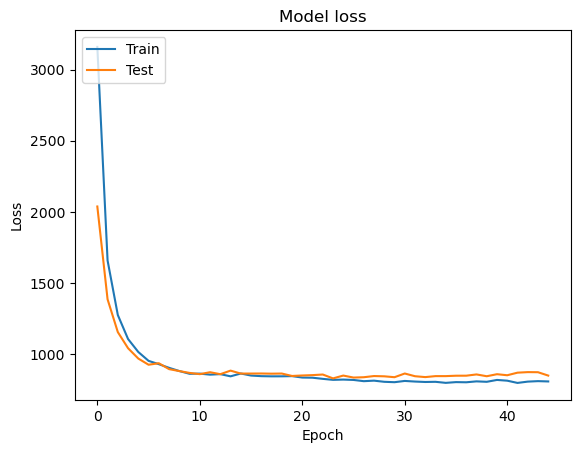

In [36]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
